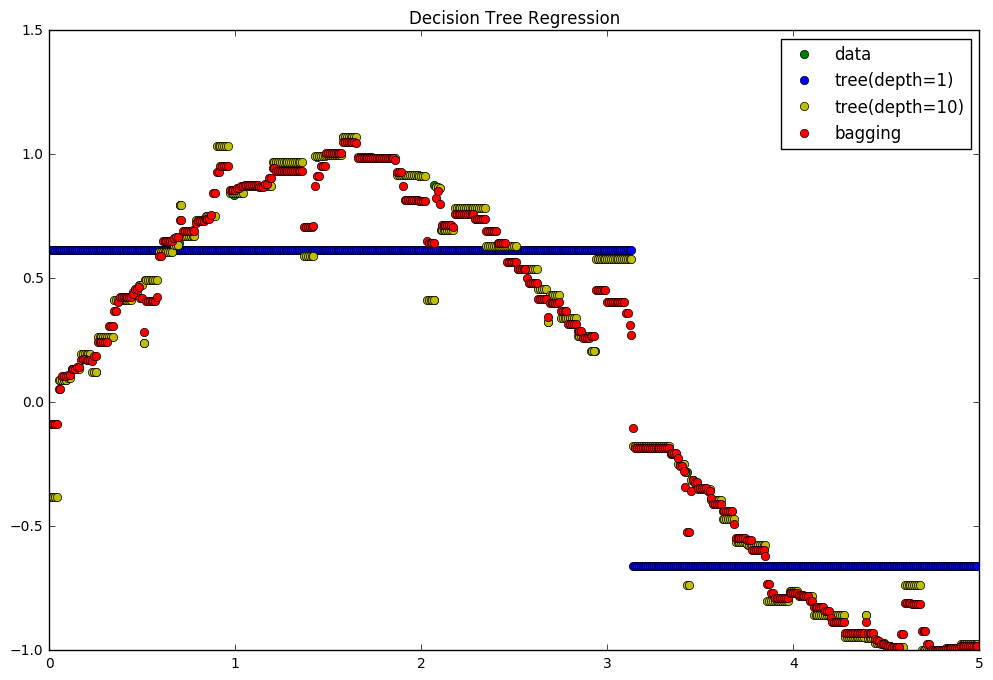

In [50]:
#第一题binomial distribution (Math question没做)

import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor
import matplotlib.pyplot as plt
# Create a random dataset
rng = np.random.RandomState(1)
X = np.sort(5 * rng.rand(80, 1), axis=0)
y = np.sin(X).ravel()
y[::5] += 1 * (0.5 - rng.rand(16))
n_estimators = 10 # L in the text
tree_max_depth = 10
bagging_max_depth = 10

# TODO define the regressor by bagging stumps
tree = DecisionTreeRegressor(max_depth=1)
tree.fit(X, y)
tree_ = DecisionTreeRegressor(max_depth=10)
tree_.fit(X, y)

bagging = BaggingRegressor(n_estimators=n_estimators)
bagging.fit(X, y)

# Predict
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_tree = tree.predict(X_test)
y_tree_ = tree_.predict(X_test)
y_bagging = bagging.predict(X_test)
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(X, y, 'o', c="g", label="data")
plt.plot(X_test,y_tree,'o', c="b", label = "tree(depth=1)")
plt.plot(X_test,y_tree_,'o', c="y", label = "tree(depth=10)")
plt.plot(X_test,y_bagging,'o', c="r", label = "bagging")
# TODO add plots for Bagging/Tree
plt.title("Decision Tree Regression")
plt.legend(loc=1, numpoints=1)
plt.show()

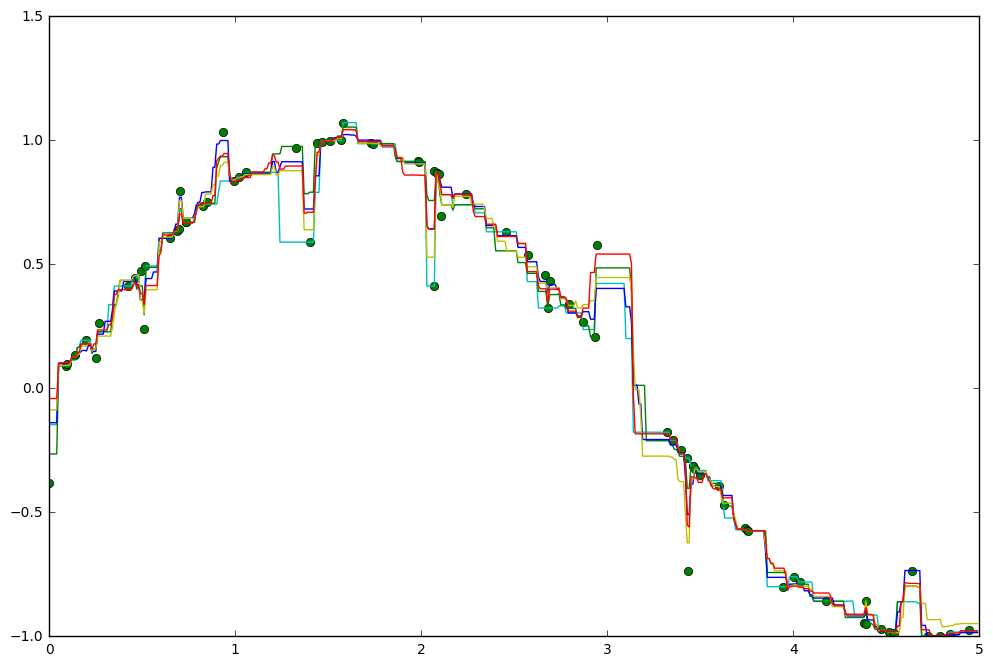

In [69]:
# Illustrate the role of L（可添加文字解释和每条曲线的标签）
plt.figure(figsize=(12, 8))
C= [2,4,6,8,10]
Colour = ['c','g','b','y','r']
plt.plot(X, y, 'o', c="g", label="data")
for i in range(0,5):
    bagging = BaggingRegressor(n_estimators=C[i])
    bagging.fit(X, y)
    y_bagging = bagging.predict(X_test)
    plt.plot(X_test,y_bagging,'g-', c= Colour[i],label ='bagging')
    
    
plt.show()

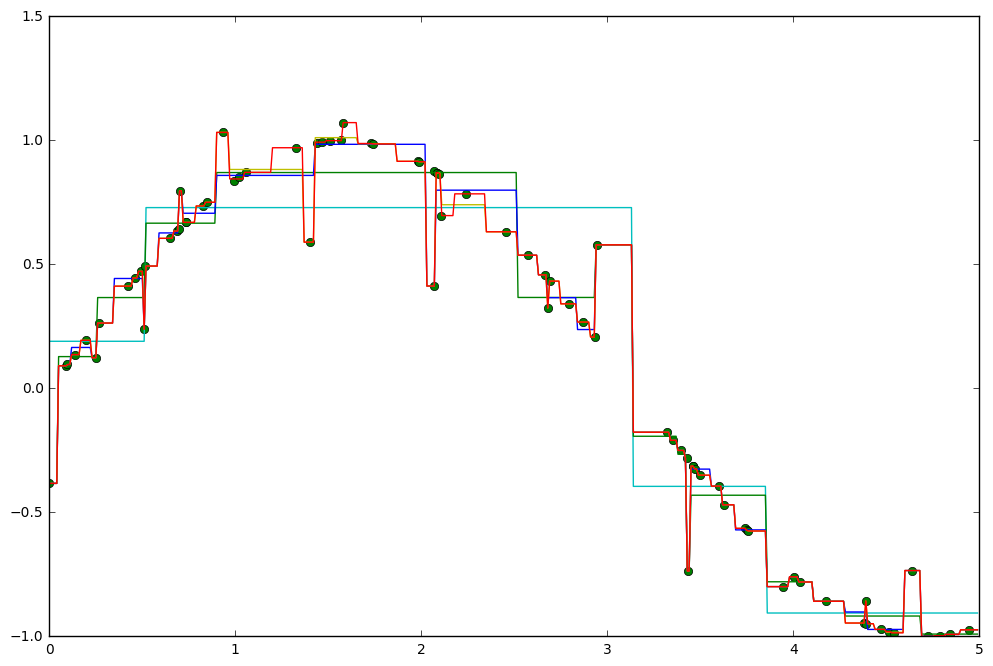

In [71]:
# Illustrate the role of the tree depth(麻烦加一下文字解释和每条曲线的标签)
plt.figure(figsize=(12, 8))
C= [2,4,6,8,10]
Colour = ['c','g','b','y','r']
plt.plot(X, y, 'o', c="g", label="data")
for i in range(0,5):
    tree_ = DecisionTreeRegressor(max_depth= C[i])
    tree_.fit(X, y)
    y_tree_ = tree_.predict(X_test)
    plt.plot(X_test,y_tree_,'g-', c= Colour[i],label ='bagging')
    
    
plt.show()


Tree: 0.0303 (error) = 0.0004 (bias^2)  + 0.0199 (var) + 0.0098 (noise)
Bagging(Tree): 0.0240 (error) = 0.0005 (bias^2)  + 0.0134 (var) + 0.0098 (noise)


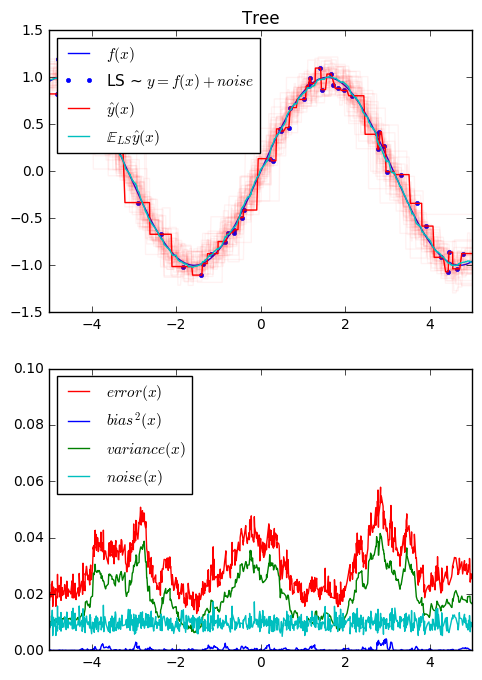

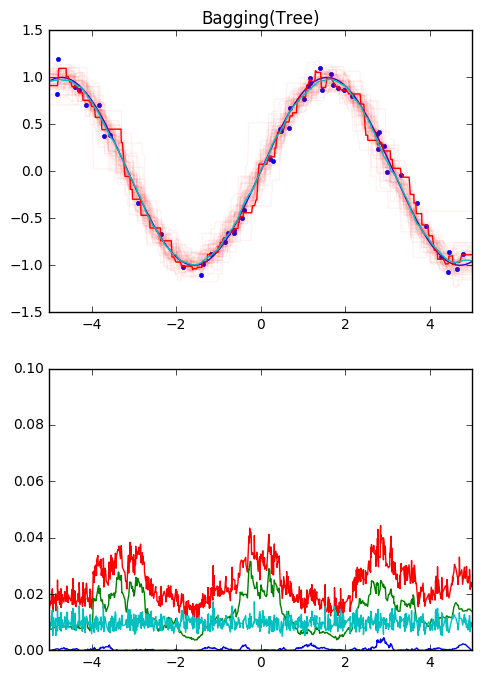

In [94]:
# biais ,variance(第三四五题不会，以下代码仅供参考）

# Settings
n_repeat = 50       # Number of iterations for computing expectations
n_train = 50        # Size of the training set
n_test = 1000       # Size of the test set
noise = 0.1         # Standard deviation of the noise
np.random.seed(0)

# Change this for exploring the bias-variance decomposition of other
# estimators. This should work well for estimators with high variance (e.g.,
# decision trees or KNN), but poorly for estimators with low variance (e.g.,
# linear models).
estimators = [("Tree", DecisionTreeRegressor()),
              ("Bagging(Tree)", BaggingRegressor(DecisionTreeRegressor()))]

n_estimators = len(estimators)

# Generate data
def f(x):
    x = x.ravel()

    return np.sin(x)



for i in range(n_repeat):
    X, y = generate(n_samples=n_train, noise=noise)
    X_train.append(X)
    y_train.append(y)

X_test, y_test = generate(n_samples=n_test, noise=noise, n_repeat=n_repeat)

# Loop over estimators to compare
for n, (name, estimator) in enumerate(estimators):
    # Compute predictions
    y_predict = np.zeros((n_test, n_repeat))

    for i in range(n_repeat):
        estimator.fit(X_train[i], y_train[i])
        y_predict[:, i] = estimator.predict(X_test)

    # Bias^2 + Variance + Noise decomposition of the mean squared error
    y_error = np.zeros(n_test)

    for i in range(n_repeat):
        for j in range(n_repeat):
            y_error += (y_test[:, j] - y_predict[:, i]) ** 2

    y_error /= (n_repeat * n_repeat)

    y_noise = np.var(y_test, axis=1)
    y_bias = (f(X_test) - np.mean(y_predict, axis=1)) ** 2
    y_var = np.var(y_predict, axis=1)

    print("{0}: {1:.4f} (error) = {2:.4f} (bias^2) "
          " + {3:.4f} (var) + {4:.4f} (noise)".format(name,
                                                      np.mean(y_error),
                                                      np.mean(y_bias),
                                                      np.mean(y_var),
                                                      np.mean(y_noise)))
    plt.figure(figsize=(12, 8))

    # Plot figures
    plt.subplot(2, n_estimators, n + 1)
    plt.plot(X_test, f(X_test), "b", label="$f(x)$")
    plt.plot(X_train[0], y_train[0], ".b", label="LS ~ $y = f(x)+noise$")

    for i in range(n_repeat):
        if i == 0:
            plt.plot(X_test, y_predict[:, i], "r", label="$\^y(x)$")
        else:
            plt.plot(X_test, y_predict[:, i], "r", alpha=0.05)

    plt.plot(X_test, np.mean(y_predict, axis=1), "c",
             label="$\mathbb{E}_{LS} \^y(x)$")

    plt.xlim([-5, 5])
    plt.title(name)

    if n == 0:
        plt.legend(loc="upper left", prop={"size": 11})

    plt.subplot(2, n_estimators, n_estimators + n + 1)
    plt.plot(X_test, y_error, "r", label="$error(x)$")
    plt.plot(X_test, y_bias, "b", label="$bias^2(x)$"),
    plt.plot(X_test, y_var, "g", label="$variance(x)$"),
    plt.plot(X_test, y_noise, "c", label="$noise(x)$")

    plt.xlim([-5, 5])
    plt.ylim([0, 0.1])

    if n == 0:
        plt.legend(loc="upper left", prop={"size": 11})

plt.show()


In [35]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.cross_validation import cross_val_score
from sklearn.cross_validation import cross_val_predict
from sklearn import svm
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn import datasets

boston = datasets.load_boston()
X = boston.data
y = boston.target
# SVM Regression for Data Boston
svr_lin = SVR(kernel='linear')
y_lin = svr_lin.fit(X, y).predict(X)
score_SVM = svr_lin.score(X, y)
print 'Data Boston'
print 'Score(SVM)',score_SVM

# RandomForest Regression for Data Boston
clfr = RandomForestRegressor(n_estimators=10) 
predicted = cross_val_predict(clfr, X, y, cv=7)
score_RFR =  np.mean(cross_val_score(clfr, X, y, cv=7))
print 'score(RFR):',score_RFR


diabetes = datasets.load_diabetes()
X = diabetes.data
y = diabetes.target
# SVM Regression for Data diabetes
svr_lin = SVR(kernel='linear')
y_lin = svr_lin.fit(X, y).predict(X)
score_SVM = svr_lin.score(X, y)
print 'Data diabetes'
print 'Score(SVM)',score_SVM


# RandomForest Regression for Data diabetes
clfr = RandomForestRegressor(n_estimators=10) 
predicted = cross_val_predict(clfr, X, y, cv=7)
score_RFR =  np.mean(cross_val_score(clfr, X, y, cv=7))
print 'score(RFR):',score_RFR


# SVM Classifer for Data iris
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Split train and test data
X_train = X[::2]
y_train = y[::2].astype(int)
X_test = X[1::2]
y_test = y[1::2].astype(int)
# fit the model
clf_C = SVC(kernel='linear')
clf_C.fit(X_train,y_train)
# predict labels
y_pred = clf_C.predict(X_test)
score = clf_C.score(X_test, y_test)
print 'Data iris'
print('Score(SVM) : %s' % score)

# RandomForestClassifier for Data iris
clf_c = RandomForestClassifier(n_estimators=10) 
# 7-Fold Cross validation
score2 =  np.mean(cross_val_score(clf_c, X, y, cv=7))
print 'Score(RFC)',score2


# SVM Classifer for Data digits
digits = datasets.load_digits()
X = digits.data
y = digits.target

# Split train and test data
X_train = X[::2]
y_train = y[::2].astype(int)
X_test = X[1::2]
y_test = y[1::2].astype(int)
# fit the model
clf_C = SVC(kernel='linear')
clf_C.fit(X_train,y_train)
# predict labels
y_pred = clf_C.predict(X_test)
score = clf_C.score(X_test, y_test)
print 'Data digits'
print('Score(SVM) : %s' % score)



# RandomForestClassifier for Data digits
clf_c = RandomForestClassifier(n_estimators=10) 
# 7-Fold Cross validation
score2 =  np.mean(cross_val_score(clf_c, X, y, cv=7))
print 'Score(RFC)',score2




Data Boston
Score(SVM) 0.703426158584
score(RFR): 0.64381104943
Data diabetes
Score(SVM) 0.00732424756005
score(RFR): 0.355027680587
Data iris
Score(SVM) : 0.973333333333
Score(RFC) 0.946428571429
Data digits
Score(SVM) : 0.971046770601
Score(RFC) 0.903740702078


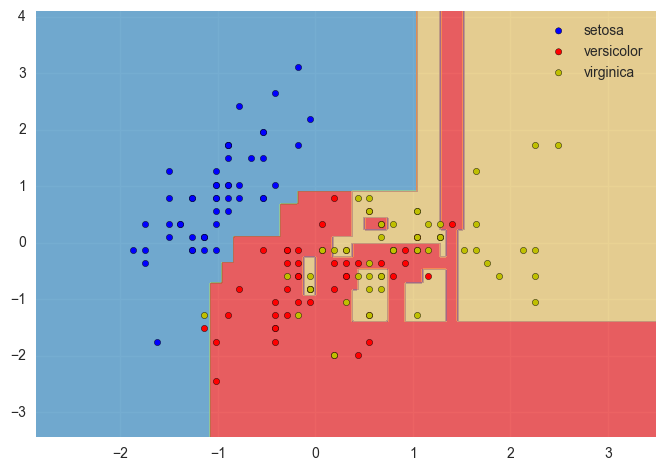

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.datasets import load_iris
from sklearn.ensemble import RandomForestClassifier
# Parameters
n_estimators = 2
plot_colors = "bry"
plot_step = 0.02
# Load data
iris = load_iris()
X_unscaled, y = iris.data[:, :2], iris.target
# Standardize
X = preprocessing.scale(X_unscaled)
# RF fitting
model = RandomForestClassifier(n_estimators=n_estimators)
clf = model.fit(X, y)
# Plot the decision boundary
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),np.arange(y_min, y_max, plot_step))
plt.figure()
for tree in model.estimators_:
# TODO use predict to obtain the probabilities you will store in Z
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, alpha=1. / n_estimators, cmap=plt.cm.Paired)
plt.axis("tight")
#Plot the training points
for i, c in zip(range(3), plot_colors):
    idx = np.where(y == i)
    plt.scatter(X[idx, 0], X[idx, 1], c=c, label=iris.target_names[i],cmap=plt.cm.Paired)
plt.legend(scatterpoints=1)
plt.show()







In [45]:
from sklearn.tree import DecisionTreeClassifier
# RandomForestClassifier for Data iris
iris = datasets.load_iris()
X, y = iris.data[:, :2], iris.target
clf_c = RandomForestClassifier(n_estimators=10) 
# 6-Fold Cross validation
score2 =  np.mean(cross_val_score(clf_c, X, y, cv=6))
print 'Score(RFC)',score2


X_train = X[::2]
y_train = y[::2].astype(int)
X_test = X[1::2]
y_test = y[1::2].astype(int)
tree = DecisionTreeClassifier()
tree.fit(X_train, y_train)
print 'Score(Tree)',tree.score(X_test,y_test)




Score(RFC) 0.728395061728
Score(Tree) 0.733333333333


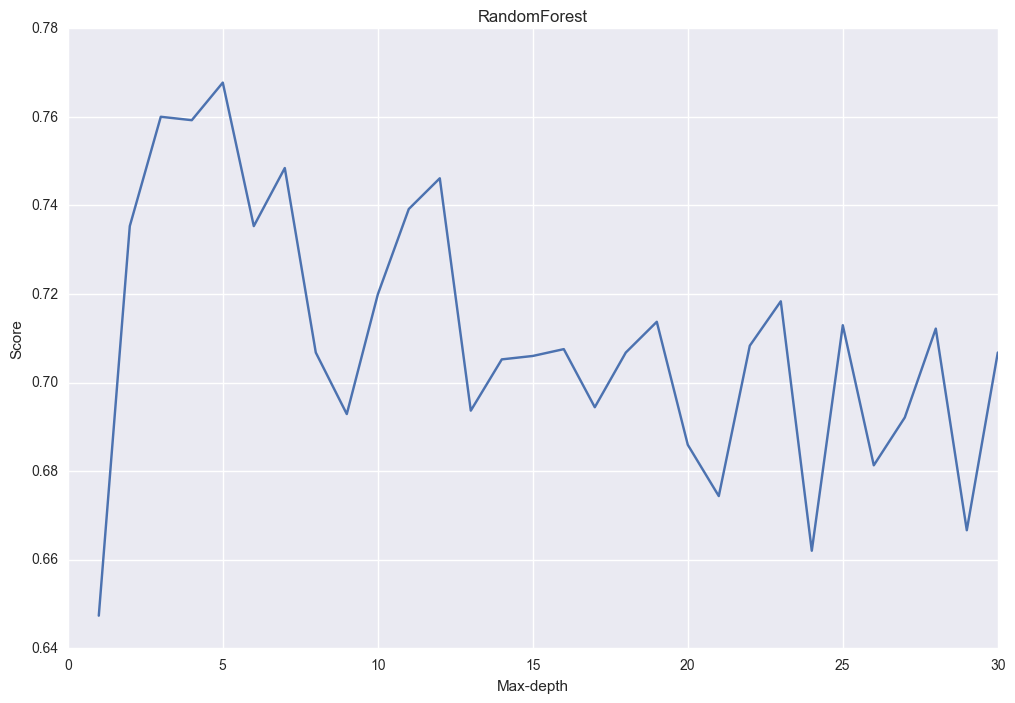

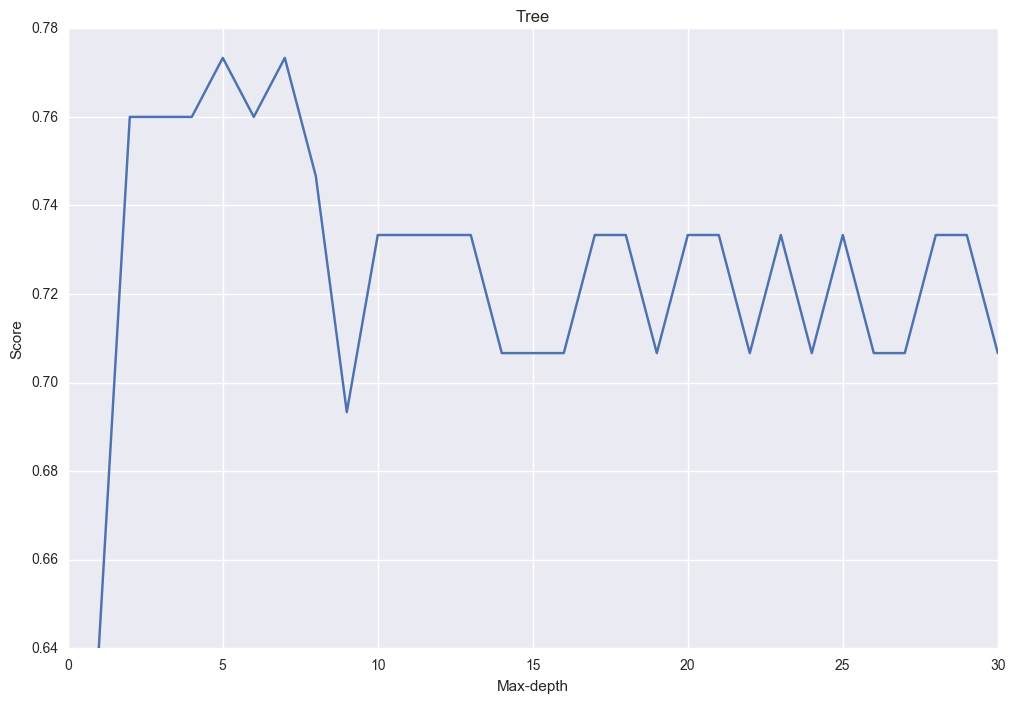

In [53]:
# Vary the parameter max_depth between 1 and 30（RANDOMFOREST）
plt.figure(figsize=(12, 8))
score = []
for i in range(1,31):
    clf_r = RandomForestClassifier(max_depth= i)
    score.append(np.mean(cross_val_score(clf_r, X, y, cv=6)))

plt.title('RandomForest')
plt.xlabel("Max-depth")
plt.ylabel("Score")
plt.plot(range(1,31),score) 
plt.show()


# Vary the parameter max_depth between 1 and 30（TREE）
plt.figure(figsize=(12, 8))
score = []
for i in range(1,31):
    tree = DecisionTreeClassifier(max_depth= i)
    tree.fit(X_train, y_train)
    score.append(tree.score(X_test,y_test))
    
plt.title('Tree')    
plt.xlabel("Max-depth")
plt.ylabel("Score")
plt.plot(range(1,31),score) 
plt.show()